<a href="https://colab.research.google.com/github/mahilohiya/ml-projects/blob/main/WarehousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv('wholesaleprices.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [24]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.600000,2.466667,11848.533333,5558.533333,7085.466667,2028.266667,2126.733333,2587.600000
std,0.507093,0.833809,4633.271597,3024.412974,1658.349647,1731.767201,1031.269707,2014.628601
min,1.000000,1.000000,6353.000000,1196.000000,4221.000000,214.000000,361.000000,447.000000
25%,1.000000,2.000000,8496.000000,2872.000000,5862.000000,748.000000,1628.500000,1241.500000
50%,2.000000,3.000000,11693.000000,4956.000000,7198.000000,1669.000000,2039.000000,1788.000000
75%,2.000000,3.000000,12967.000000,8341.500000,7788.000000,2402.500000,2920.000000,3427.500000
max,2.000000,3.000000,22615.000000,9810.000000,9735.000000,6404.000000,3516.000000,7844.000000


In [25]:
#standardizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pd.DataFrame(data_scaled, columns=data.columns)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.816497,0.662085,0.183297,1.402348,0.296815,-1.084409,0.549298,-0.642033
1,0.816497,0.662085,-1.070455,1.455055,1.549532,-0.159151,1.170596,-0.416993
2,0.816497,0.662085,-1.227732,1.112122,0.373589,0.225178,1.394424,2.700692
3,-1.224745,0.662085,0.316446,-1.493067,-1.787925,2.615429,-1.625747,-0.410827
4,0.816497,0.662085,2.405288,-0.050835,0.070240,1.127723,-0.351032,1.334521
5,0.816497,0.662085,-0.544112,0.924228,-1.223048,-0.814243,-0.332965,-0.583975
6,-1.224745,-1.820733,0.061988,-0.807545,-0.068950,-0.925418,1.017028,-1.049470
7,0.816497,-0.579324,-0.953837,-0.206216,1.460899,-0.214738,1.198700,-0.011098
8,-1.224745,0.662085,1.772603,-0.409511,1.653769,1.541938,-1.772289,-1.099821
9,-1.224745,-1.820733,-0.034747,-1.110776,-0.764904,-0.716219,-1.318611,-0.832650


In [26]:
kmeans = KMeans(n_clusters=2 , init ='k-means++')
kmeans.fit(data_scaled)
kmeans.inertia_

79.53775724383912

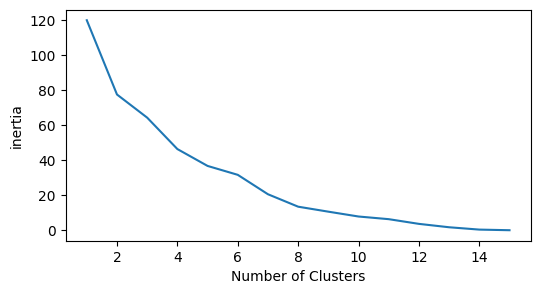

In [29]:
wcss=[]

for cluster in range(1, len(data_scaled) + 1): # Iterate up to the number of samples
  kmeans = KMeans(n_clusters = cluster, init='k-means++')
  kmeans.fit(data_scaled)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,3))
plt.plot(range(1, len(data_scaled) + 1), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.show()

In [30]:
kmeans = KMeans(n_clusters = 6, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

df = pd.DataFrame(data_scaled, columns=data.columns)
df['cluster'] = pred
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,0.816497,0.662085,0.183297,1.402348,0.296815,-1.084409,0.549298,-0.642033,1
1,0.816497,0.662085,-1.070455,1.455055,1.549532,-0.159151,1.170596,-0.416993,3
2,0.816497,0.662085,-1.227732,1.112122,0.373589,0.225178,1.394424,2.700692,3
3,-1.224745,0.662085,0.316446,-1.493067,-1.787925,2.615429,-1.625747,-0.410827,4
4,0.816497,0.662085,2.405288,-0.050835,0.070240,1.127723,-0.351032,1.334521,5


In [31]:
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
10,0.816497,0.662085,-0.541877,0.797255,-0.890363,-0.177082,-0.088059,0.934792,1
11,0.816497,0.662085,0.066232,-0.226408,-0.762407,-0.860267,-0.649134,0.314646,1
12,-1.224745,-0.579324,-0.973720,-1.031375,0.503417,-0.554836,-0.312891,-0.045008,0
13,-1.224745,-1.820733,0.854407,-1.335975,0.296191,0.222190,0.545284,-0.741195,0
14,0.816497,0.662085,-0.313780,0.980699,-0.706856,-0.226095,0.575395,0.548421,1


In [32]:
df.head(20)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,0.816497,0.662085,0.183297,1.402348,0.296815,-1.084409,0.549298,-0.642033,1
1,0.816497,0.662085,-1.070455,1.455055,1.549532,-0.159151,1.170596,-0.416993,3
2,0.816497,0.662085,-1.227732,1.112122,0.373589,0.225178,1.394424,2.700692,3
3,-1.224745,0.662085,0.316446,-1.493067,-1.787925,2.615429,-1.625747,-0.410827,4
4,0.816497,0.662085,2.405288,-0.050835,0.070240,1.127723,-0.351032,1.334521,5
5,0.816497,0.662085,-0.544112,0.924228,-1.223048,-0.814243,-0.332965,-0.583975,1
6,-1.224745,-1.820733,0.061988,-0.807545,-0.068950,-0.925418,1.017028,-1.049470,0
7,0.816497,-0.579324,-0.953837,-0.206216,1.460899,-0.214738,1.198700,-0.011098,3
8,-1.224745,0.662085,1.772603,-0.409511,1.653769,1.541938,-1.772289,-1.099821,2
9,-1.224745,-1.820733,-0.034747,-1.110776,-0.764904,-0.716219,-1.318611,-0.832650,0


In [33]:
df['cluster'].value_counts()

,count
cluster,
1,5
0,4
3,3
4,1
5,1
2,1


In [39]:
# Function to take input, standardize it, and predict the cluster
def get_cluster_prediction():

    Channel = int(input("Enter Channel (e.g., 1, 2): "))
    Region = int(input("Enter Region (e.g., 1, 2, 3): "))
    Fresh = float(input("Enter annual spending on Fresh products: "))
    Milk = float(input("Enter annual spending on Milk: "))
    Grocery = float(input("Enter annual spending on Grocery: "))
    Frozen = float(input("Enter annual spending on Frozen products: "))
    Detergents_Paper = float(input("Enter annual spending on Detergents_Paper: "))
    Delicassen = float(input("Enter annual spending on Delicassen: "))


    user_data = np.array([[Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]])
    user_data_scaled = scaler.transform(user_data)
    cluster = kmeans.predict(user_data_scaled)

    print(f"The customer belongs to the cluster: {cluster[0]}")


In [41]:
get_cluster_prediction()

Enter Channel (e.g., 1, 2): 1
Enter Region (e.g., 1, 2, 3): 3
Enter annual spending on Fresh products: 1234
Enter annual spending on Milk: 9000
Enter annual spending on Grocery: 2500
Enter annual spending on Frozen products: 522
Enter annual spending on Detergents_Paper: 250
Enter annual spending on Delicassen: 255
The customer belongs to the cluster: 1


In [42]:
# Add the cluster column to the original data
data['cluster'] = df['cluster']

# Group by cluster and calculate the mean of each feature
cluster_characteristics = data.groupby('cluster').mean()

# Display the characteristics of each cluster
display(cluster_characteristics)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,,,
0,1.0,1.250000,11745.500000,2428.0,7071.750000,1202.500000,2109.500000,1289.25
1,2.0,3.000000,10818.800000,7824.8,6032.600000,970.200000,2137.600000,2810.20
2,1.0,3.000000,19783.000000,4362.0,9735.000000,4608.000000,361.000000,447.00
3,2.0,2.666667,6996.333333,7858.0,8892.666667,1945.333333,3376.666667,4062.00
4,1.0,3.000000,13265.000000,1196.0,4221.000000,6404.000000,507.000000,1788.00
5,2.0,3.000000,22615.000000,5410.0,7198.000000,3915.000000,1777.000000,5185.00
